# Climate Change and Impacts in Africa

According to the [United Nations](https://www.un.org/en/climatechange/what-is-climate-change), Climate change refers to long-term shifts in temperatures and weather patterns. Such shifts can be natural, due to changes in the sun’s activity or large volcanic eruptions. But since the 1800s, **human activities** have been the main driver of climate change, primarily due to the burning of fossil fuels like coal, oil, and gas.

The consequences of climate change now include, among others, intense droughts, water scarcity, severe fires, rising sea levels, flooding, melting polar ice, catastrophic storms, and declining biodiversity.

You work for a Non-governmental organization tasked with reporting the state of climate change in Africa at the upcoming African Union Summit. The head of analytics has provided you with [IEA-EDGAR CO2 dataset](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117) which you will clean, combine and analyze to create a report on the state of climate change in Africa. You will also provide insights on the impact of climate change on African regions (with four countries, one from each African region, as case studies). 

## Dataset

*The dataset, IEA-EDGAR CO2, is a component of the EDGAR (Emissions Database for Global Atmospheric Research) Community GHG database version 7.0 (2022) including or based on data from IEA (2021) Greenhouse Gas Emissions from Energy, www.iea.org/statistics, as modified by the Joint Research Centre. The data source was the [EDGARv7.0_GHG website](https://edgar.jrc.ec.europa.eu/dataset_ghg70) provided by Crippa *et. al.* (2022) and with [DOI](https://data.europa.eu/doi/10.2904/JRC_DATASET_EDGAR).*

The dataset contains three sheets - `IPCC 2006`, `1PCC 1996`, and `TOTALS BY COUNTRY` on the amount of CO2 (a greenhouse gas) generated by countries between 1970 and 2021. **You can download the dataset from your workspace or inspect the dataset directly [here](https://docs.google.com/spreadsheets/d/1cNhVUPKYP79AayGJp89_tXCJmHoxQO4cwiaseSziwbY/edit#gid=191680117)**.

### TOTALS BY COUNTRY SHEET

This sheet contains the annual CO2 (kt) produced between 1970 - 2021 in each country. The relevant columns in this sheet are:

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |


### IPCC 2006

These sheets contain the amount of CO2 by country and the industry responsible. 

| Columns | Description |
| ------- | ------------|
| `C_group_IM24_sh` | The region of the world |
| `Country_code_A3` | The country code |
| `Name`            | The name of the country |
| `Y_1970 - Y_2021` | The amount of CO2 (kt) from 1970 - 2021 |
| `ipcc_code_2006_for_standard_report_name` | The industry responsible for generating CO2 |

In [4]:
# Setup
import pandas as pd
import numpy as np
import pingouin
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
import seaborn as sns
import matplotlib.pyplot as plt
import inspect

plt.style.use('ggplot')
# The sheet names containing the datasets
sheet_names = ['IPCC 2006', 'TOTALS BY COUNTRY']

# The column names of the dataset starts from rows 11
# Skip the first 10 rows
datasets = pd.read_excel('IEA_EDGAR_CO2_1970-2021.xlsx', sheet_name = sheet_names, skiprows = 10)

# Selecting only the African regions
african_regions = ['Eastern_Africa', 'Western_Africa', 'Southern_Africa', 'Northern_Africa']

ipcc_2006_africa = datasets['IPCC 2006'].query('C_group_IM24_sh in @african_regions')

totals_by_country_africa = datasets['TOTALS BY COUNTRY'].query('C_group_IM24_sh in @african_regions')

temperatures = pd.read_csv('temperatures.csv')

In [5]:
# Overview of the dataset
ipcc_2006_africa
totals_by_country_africa

,IPCC_annex,C_group_IM24_sh,Country_code_A3,Name,Substance,Y_1970,Y_1971,Y_1972,Y_1973,Y_1974,...,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018,Y_2019,Y_2020,Y_2021
2,Non-Annex_I,Southern_Africa,AGO,Angola,CO2,20393.274068,19959.926969,21860.851718,22960.875811,23436.330631,...,45747.276981,51282.174272,53677.191990,56211.792887,55507.493078,51285.300069,49702.305850,51343.735537,49153.126915,50275.123467
14,Non-Annex_I,Eastern_Africa,BDI,Burundi,CO2,4385.562636,4252.930585,4363.612720,4358.525092,4369.160007,...,8459.288013,9149.054624,9159.419598,9266.117147,9566.111424,9682.155915,9978.899053,10259.091787,10117.781634,10195.577902
16,Non-Annex_I,Western_Africa,BEN,Benin,CO2,4318.786819,4331.965113,4520.457422,4610.356288,4687.945024,...,12358.663172,13531.050710,14190.811414,14756.624395,16399.517824,16772.596446,18298.343482,18596.362918,18428.166791,19018.648794
17,Non-Annex_I,Western_Africa,BFA,Burkina Faso,CO2,8158.106987,8168.513580,8287.030827,8459.268901,8556.373860,...,22910.057888,23772.638294,23681.040829,25167.623449,25915.830695,26939.500315,28175.585069,28984.431716,29300.234771,29548.239352
31,Non-Annex_I,Southern_Africa,BWA,Botswana,CO2,947.246888,1023.689503,971.345976,1047.179577,1331.197530,...,5696.663997,7668.026698,9295.462092,9170.933436,8868.575860,9533.137111,9601.783432,9460.722213,8927.915806,9239.451125
32,Non-Annex_I,Western_Africa,CAF,Central African Republic,CO2,2221.039837,2238.112038,2306.486104,2411.363740,2531.722989,...,3350.857132,3277.499902,3326.291068,3410.624910,3502.832122,3550.201115,3600.478795,3668.266311,3650.347259,3667.742953
37,Non-Annex_I,Western_Africa,CIV,Cote d'Ivoire,CO2,7713.156989,7801.904337,8220.017947,8500.543477,8811.931410,...,33333.373417,34849.550544,36460.471747,33168.294698,33222.963473,34838.947783,34534.696587,35788.183446,35866.852379,36798.502600
38,Non-Annex_I,Western_Africa,CMR,Cameroon,CO2,11614.401432,11691.132467,11915.107083,12188.011031,12438.956801,...,29414.168493,31012.417419,32656.139176,34051.818592,35355.845731,35976.089006,37153.416784,37773.892381,37324.102288,37706.440793
39,Non-Annex_I,Western_Africa,COD,Congo_the Democratic Republic of the,CO2,27326.490815,27380.735009,28111.467506,28795.011224,29650.136516,...,72192.015175,81778.022776,92810.145764,93900.027720,96166.320424,96667.225759,85939.218135,86300.938999,87207.413816,87436.266580
40,Non-Annex_I,Western_Africa,COG,Congo,CO2,2926.865147,3187.205060,3112.797774,10123.951899,14079.027519,...,9460.766249,10558.268602,10530.183064,11027.175109,11061.145263,11148.093592,12183.362986,12993.886916,13259.697771,13175.141273


## Cleaning the datasets


In [6]:
# Rename specified columns
ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code','ipcc_code_2006_for_standard_report_name':'Industry'}, inplace=True)
totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code'}, inplace=True)

/var/folders/sg/s6gdj1r117337m34kc_6yd5h0000gn/T/ipykernel_926/4138361414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipcc_2006_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code','ipcc_code_2006_for_standard_report_name':'Industry'}, inplace=True)
/var/folders/sg/s6gdj1r117337m34kc_6yd5h0000gn/T/ipykernel_926/4138361414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals_by_country_africa.rename(columns={'C_group_IM24_sh':'Region','Country_code_A3':'Code'}, inplace=True)


In [7]:
# Remove columns that will not be used for the analysis
ipcc_2006_africa = ipcc_2006_africa.drop(['IPCC_annex','ipcc_code_2006_for_standard_report','Substance'],axis=1) 
totals_by_country_africa = totals_by_country_africa.drop(['IPCC_annex','Substance'],axis=1)  

In [8]:
# Melt all the year columns(Y_1970 to Y_2021) into two columns, 'Year' and 'CO2'
ipcc_2006_africa=pd.melt(ipcc_2006_africa, id_vars = ipcc_2006_africa.iloc[:, 0:5])
totals_by_country_africa=pd.melt(totals_by_country_africa, id_vars = totals_by_country_africa.iloc[:, 0:3])

In [9]:
# Rename the columns to Year and CO2
ipcc_2006_africa.rename(columns={'variable':'Year','value':'CO2'},inplace=True)
totals_by_country_africa.rename(columns={'variable':'Year','value':'CO2'},inplace=True)


In [10]:
# Remove the alphabets in 'Year column' and Convert 'Year' to int
ipcc_2006_africa['Year']= ipcc_2006_africa['Year'].str.split('_').str[-1]
ipcc_2006_africa['Year']= ipcc_2006_africa.Year.astype(int)

totals_by_country_africa['Year']= totals_by_country_africa['Year'].str.split('_').str[-1]
totals_by_country_africa['Year']= totals_by_country_africa.Year.astype(int)


In [11]:
# Remove null values from CO2
ipcc_2006_africa = ipcc_2006_africa.dropna(subset=['CO2'])
totals_by_country_africa = totals_by_country_africa.dropna(subset=['CO2'])
print(ipcc_2006_africa)
print(totals_by_country_africa)

                Region Code      Name  \
0      Southern_Africa  AGO    Angola   
1      Southern_Africa  AGO    Angola   
3      Southern_Africa  AGO    Angola   
4      Southern_Africa  AGO    Angola   
5      Southern_Africa  AGO    Angola   
...                ...  ...       ...   
60209  Southern_Africa  ZWE  Zimbabwe   
60210  Southern_Africa  ZWE  Zimbabwe   
60211  Southern_Africa  ZWE  Zimbabwe   
60213  Southern_Africa  ZWE  Zimbabwe   
60214  Southern_Africa  ZWE  Zimbabwe   

                                                Industry fossil_bio  Year  \
0              Manufacturing Industries and Construction        bio  1970   
1                          Residential and other sectors        bio  1970   
3                         Emissions from biomass burning        bio  1970   
4          Main Activity Electricity and Heat Production     fossil  1970   
5      Petroleum Refining - Manufacture of Solid Fuel...     fossil  1970   
...                                          

## The trend of CO2 levels across the African regions

<AxesSubplot:xlabel='Year', ylabel='CO2'>

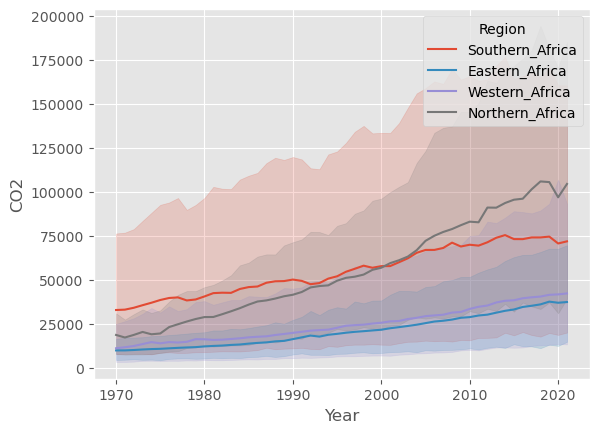

In [12]:
# Plot showing `CO2` vs. `Year` in each `Region` to show the trend of CO2 levels by year
sns.lineplot(x='Year',y='CO2', data=totals_by_country_africa, hue='Region')


## Determining the relationship between time (`Year`) and `CO2` levels across the African regions

In [13]:
relationship_btw_time_CO2 = totals_by_country_africa.groupby('Region').corr(method='spearman')

relationship_btw_time_CO2

Year       CO2
Region                                  
Eastern_Africa  Year  1.000000  0.181768
                CO2   0.181768  1.000000
Northern_Africa Year  1.000000  0.429875
                CO2   0.429875  1.000000
Southern_Africa Year  1.000000  0.260986
                CO2   0.260986  1.000000
Western_Africa  Year  1.000000  0.324071
                CO2   0.324071  1.000000

## Is there is a significant difference in the CO2 levels among the African Regions?

- Is it true that the `CO2` levels of the `Southern_Africa` and `Northern_Africa` region do not differ significantly? 

In [14]:

aov_results = pingouin.anova(dv='CO2', data=totals_by_country_africa, between='Region')

pw_ttest_result = pingouin.pairwise_tests(dv='CO2', data=totals_by_country_africa, between='Region',padjust="bonf").round(3)
pw_ttest_result

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Region,Eastern_Africa,Northern_Africa,False,True,-9.436,388.384,two-sided,0.000,0.000,bonf,1.554e+17,-0.801
1,Region,Eastern_Africa,Southern_Africa,False,True,-6.815,641.442,two-sided,0.000,0.000,bonf,4.024e+08,-0.422
2,Region,Eastern_Africa,Western_Africa,False,True,-1.557,1917.149,two-sided,0.120,0.718,bonf,0.173,-0.059
3,Region,Northern_Africa,Southern_Africa,False,True,0.081,881.040,two-sided,0.936,1.000,bonf,0.079,0.005
4,Region,Northern_Africa,Western_Africa,False,True,7.589,567.965,two-sided,0.000,0.000,bonf,9.641e+10,0.418
5,Region,Southern_Africa,Western_Africa,False,True,5.721,795.804,two-sided,0.000,0.000,bonf,5.437e+05,0.335


## The top 5 industries in each African region.

In [15]:
count = ipcc_2006_africa.groupby(['Region','Industry']).size().reset_index(name='Count')
count= count.sort_values(['Region','Count'], ascending=False)

top_5_industries =count.groupby('Region').head().reset_index(drop=True)
top_5_industries

,Region,Industry,Count
0,Western_Africa,Residential and other sectors,2541
1,Western_Africa,Manufacturing Industries and Construction,2265
2,Western_Africa,Main Activity Electricity and Heat Production,1895
3,Western_Africa,Glass Production,1300
4,Western_Africa,Road Transportation no resuspension,1297
5,Southern_Africa,Residential and other sectors,1144
6,Southern_Africa,Manufacturing Industries and Construction,1067
7,Southern_Africa,Main Activity Electricity and Heat Production,798
8,Southern_Africa,Road Transportation no resuspension,580
9,Southern_Africa,Emissions from biomass burning,572


## The industry responsible for the most amount of CO2 (on average) in each African Region

In [16]:
avg = ipcc_2006_africa.groupby(['Region','Industry']).CO2.mean().reset_index()
avg= avg.sort_values(['Region','CO2'], ascending=[True,False])

top_5_industries =avg.groupby('Region').head(1).reset_index(drop=True)
top_5_industries

,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


In [17]:
avg = ipcc_2006_africa.groupby(['Region','Industry'])['CO2'].mean().reset_index()

max_co2_industries = avg.loc[avg.groupby('Region')['CO2'].idxmax()].reset_index(drop=True)
max_co2_industries

,Region,Industry,CO2
0,Eastern_Africa,Residential and other sectors,7904.439282
1,Northern_Africa,Main Activity Electricity and Heat Production,13612.230148
2,Southern_Africa,Main Activity Electricity and Heat Production,11377.802504
3,Western_Africa,Residential and other sectors,8702.936136


## Predicting the `CO2` levels (at each African region) in the year 2025

In [18]:
newdata = pd.DataFrame({ 'Year': 2025, 'Region': african_regions })
newdata = pd.get_dummies(newdata)

reg = LinearRegression()
lin_fit = np.log10(totals_by_country_africa['CO2'])
features = pd.get_dummies(totals_by_country_africa[['Year', 'Region']])

reg.fit(features, lin_fit)

predicted_co2= reg.predict(newdata)
predicted_co2= np.round(10**predicted_co2,2)
predicted_co2

array([15177.72, 10788.07, 37761.69, 41081.9 ])

## Determining if CO2 levels affect annual temperature in the selected African countries

In [19]:
countries = ["Ethiopia", "Mozambique", "Nigeria", "Tunisia"]
                                                                             
selected_countries = totals_by_country_africa[['Name', 'Year','CO2']][totals_by_country_africa['Name'].isin(countries)]

temp_long = temperatures.melt(id_vars=['Year'],value_vars=countries,var_name='Name',value_name='Temperature')                                                                            
joined = pd.merge(selected_countries, temp_long, on=['Name','Year'], how='inner')

model_temp = OLS.from_formula("Temperature ~ np.log10(CO2) + Name", data = joined).fit()
model_temp.summary()
joined

,Name,Year,CO2,Temperature
0,Ethiopia,1970,43392.140923,22.81
1,Mozambique,1970,24200.035990,24.10
2,Nigeria,1970,161347.912692,26.91
3,Tunisia,1970,5725.783312,19.42
4,Ethiopia,1971,43458.192502,22.30
...,...,...,...,...
203,Tunisia,2020,31486.838616,20.87
204,Ethiopia,2021,201641.675813,23.35
205,Mozambique,2021,36771.841809,24.53
206,Nigeria,2021,611144.166997,27.67


Text(0.5, 1.0, 'Relationship between Temperature and CO2')

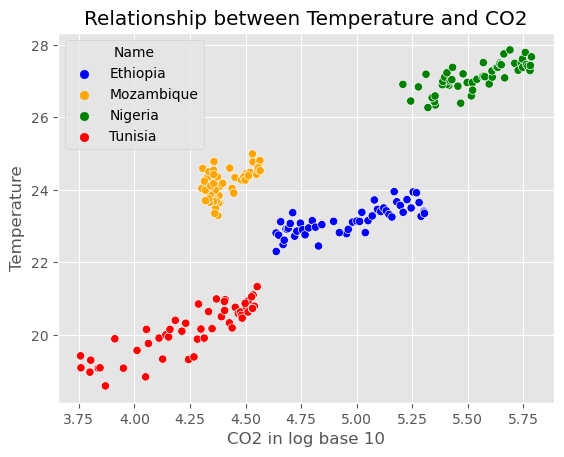

In [20]:
sns.scatterplot(data=joined, x=np.log10(joined['CO2']), y='Temperature', hue='Name', palette=dict(Ethiopia='blue',Mozambique='orange',Nigeria='green',Tunisia='red'))

plt.xlabel('CO2 in log base 10')
plt.title('Relationship between Temperature and CO2')


In [21]:
#ipcc_2006_africa.to_csv('ipcc_2006_africa.csv')
#totals_by_country_africa.to_csv('totals_by_country_africa.csv')
